In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# EDA (Exploratory Data Analysis)

# - Nasabah gender male lebih banyak dari gender female
- Male : 54.57 %
- Female : 45.43 %

Male      54.57
Female    45.43
Name: Gender, dtype: float64


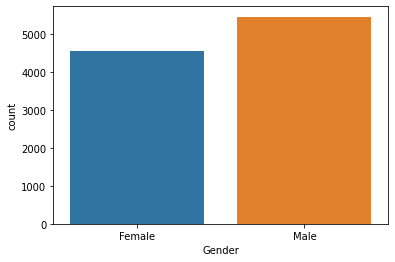

In [20]:
sns.countplot(df['Gender'])
print(df['Gender'].value_counts(normalize= True) * 100)

# - Nasabah yang menutup akunnya ada sebanyak 20.3% 

0    79.63
1    20.37
Name: Exited, dtype: float64


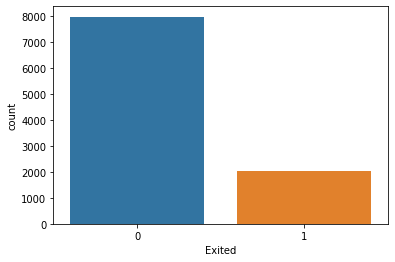

In [3]:
sns.countplot(df['Exited'])
print(df['Exited'].value_counts(normalize= True) * 100)

# - Nasabah dengan gender Female dan Male memiliki rata rata balance yang hampir sama 

<AxesSubplot:xlabel='Gender', ylabel='Balance'>

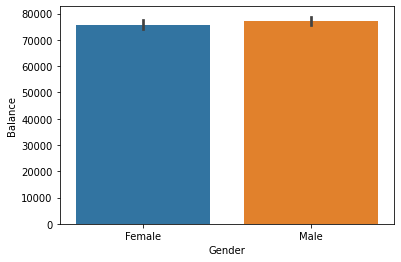

In [4]:
sns.barplot(df['Gender'], df['Balance'])

# Penutupan akun bank berdasarkan gender
- Gender Female yang menutup akun bank ada sebanyak 55 %
- Gender Male yang menutup akun bank ada sebanyak 44 %

Female    55.915562
Male      44.084438
Name: Gender, dtype: float64


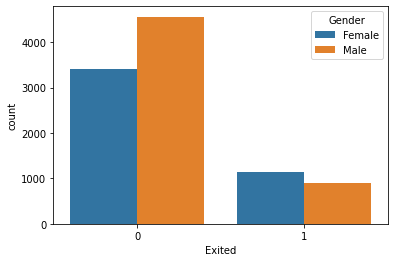

In [28]:
sns.countplot(df['Exited'], hue= df['Gender'])
print(df[df['Exited']== 1]['Gender'].value_counts(normalize= True) * 100)

# - Berapa lama nasabah telah bersama bank 
tidak terlihat berapa lama nasabah bersama bank mempengaruhi dalam penutupan akun nasabah

<AxesSubplot:xlabel='Tenure', ylabel='count'>

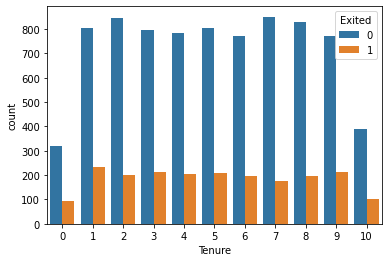

In [6]:
sns.countplot(df['Tenure'], hue= df['Exited'])

# - Asal Negara Nasabah :
- France : 50.14 %
- Germany : 25.09 %
- Spain : 24.77 %

France     50.14
Germany    25.09
Spain      24.77
Name: Geography, dtype: float64


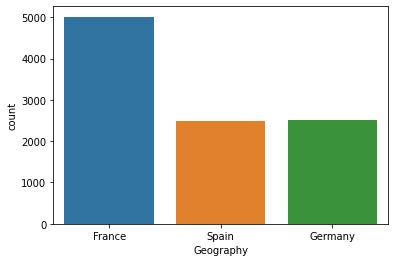

In [7]:
sns.countplot(df['Geography'])
print(df['Geography'].value_counts(normalize= True) * 100)

# - Nasabah yang menutup akun bank berdasarkan Geography :
- Germany : 39.96 %
- France : 39.76 %
- Spain : 20.27 %

Nasabah asal Germany dan France hampir sama banyaknya yang menutup akun bank

Germany    39.960727
France     39.764359
Spain      20.274914
Name: Geography, dtype: float64

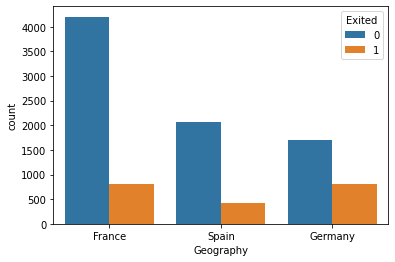

In [8]:
sns.countplot(df['Geography'], hue= df['Exited'])
df[df['Exited']== 1]['Geography'].value_counts(normalize= True) * 100

# - Perkiraan penghasilan nasabah dengan gender female dan male hampir sama

<AxesSubplot:xlabel='Gender', ylabel='EstimatedSalary'>

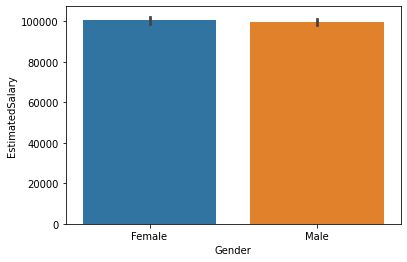

In [9]:
sns.barplot(df['Gender'], df['EstimatedSalary'])

# - Nasabah yang memiliki credit card :
- 70.55 % nasabah memiliki credit card 
- 29.45 % nasabah tidak memiliki credit card

1    70.55
0    29.45
Name: HasCrCard, dtype: float64


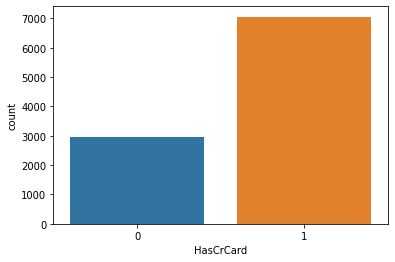

In [10]:
sns.countplot(df['HasCrCard'])
print(df['HasCrCard'].value_counts(normalize= True) * 100)

# - Nasabah yang memiliki credit card dan menutup akun bank:
nasabah yang memiliki credit card dan menutup akun bank 39.9 % lebih banyak dibanding yang tidak memiliki credit card

1    69.906726
0    30.093274
Name: HasCrCard, dtype: float64


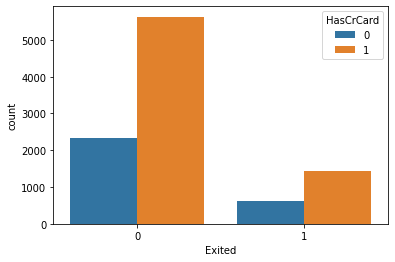

In [50]:
sns.countplot(df['Exited'], hue= df['HasCrCard'])

print(df[df['Exited']== 1]['HasCrCard'].value_counts(normalize= True) * 100)

# - Kebanyakan nasabah hanya menggunakan 1 produk yang disediakan oleh bank

1    50.84
2    45.90
3     2.66
4     0.60
Name: NumOfProducts, dtype: float64


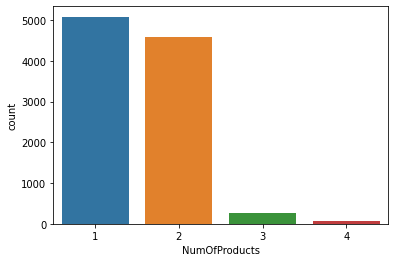

In [11]:
sns.countplot(df['NumOfProducts'])
print(df['NumOfProducts'].value_counts(normalize= True) * 100)

# - Nasabah yang hanya menggunakan 1 produk bank paling banyak yang menutup akun bank

1    69.170349
2    17.083947
3    10.800196
4     2.945508
Name: NumOfProducts, dtype: float64

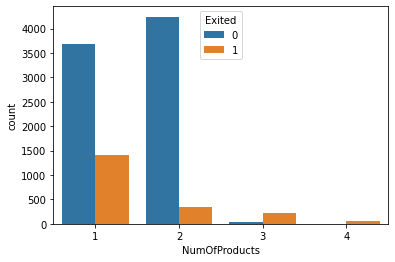

In [12]:
sns.countplot(df['NumOfProducts'], hue= df['Exited'])
df[df['Exited']== 1]['NumOfProducts'].value_counts(normalize= True) * 100

# - Nasabah yang hanya menggunakan 1 produk dari bank sampai 4 produk dari bank, rata2 memiliki penghasilan yang hampir sama

<AxesSubplot:xlabel='NumOfProducts', ylabel='EstimatedSalary'>

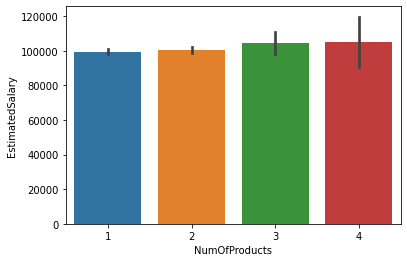

In [16]:
sns.barplot(df['NumOfProducts'], df['EstimatedSalary'])

# - Nasabah dengan gender female dan male hampir sama banyaknya yang hanya menggunakan 1 produk bank hingga 2 produk bank

<AxesSubplot:xlabel='Gender', ylabel='count'>

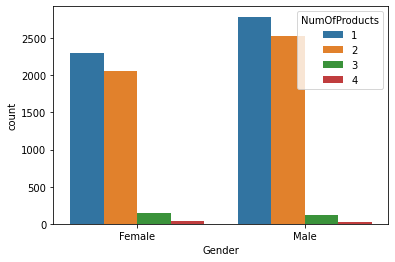

In [18]:
sns.countplot(df['Gender'], hue= df['NumOfProducts'])

# - EDA Insight :

Nasabah yang menutup akun bank ada sekitar 20.3% dari kesuluruhan nasabah.

Nasabah dengan gender female lebih banyak 9.14% dari gender male, namun gender female 11.83% lebih banyak menutup akun bank dibandingkan dengan gender male.

Dari nasabah yang memiliki credit card dan menutup akun bank, 39.9 % lebih banyak dibanding yang tidak memiliki credit card

Nasabah yang hanya menggunakan 1 produk bank paling banyak menutup akun bank, dan persentase yang menutup akun bank menurun seiring banyaknya produk bank yang digunakan nasabah

# - Conclusion :

Karena nasabah dengan gender female dan male hampir memiliki penghasilan yang sama, dan nasabah yang hanya menggunakan 1 produk bank hingga 4 produk bank juga memiliki penghasilan yang hampir sama, mungkin manajemen bank bisa lebih menawarkan produk bank dengan promo atau reward yang lebih menarik lagi, karena terlihat bila semakin banyak produk bank yang digunakan nasabah, semakin menurun persentase penutupan akun bank.

# - Data Cleaning & Preprocessing

- Cek tipe data pada dataset

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- Cek missing value pada dataset (tidak ada null / missing value pada dataset)

In [53]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [54]:
from sklearn.model_selection import train_test_split

- kolom rownumber, customerid, dan surname tidak digunakan karena tidak berkaitan dengan tujuan prediksi.

- target data adalah Exited (nasabah yang menutup akun bank) karena tujuan prediksi adalah untuk mengetahui nasabah yang akan menutup akun bank.

In [74]:
X = df.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname'], axis= 1)
y = df['Exited']

- split data untuk train dan test, 80% data untuk train dan 20% data untuk test

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size= 0.2, random_state= 2021)
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
810,618,France,Female,35,10,0.00,2,1,0,180439.75
548,508,France,Male,49,7,122451.46,2,1,1,75808.10
3889,418,France,Female,39,2,0.00,2,0,0,9041.71
1703,790,Germany,Male,42,1,85839.62,1,1,0,198182.73
7770,699,France,Male,29,3,125689.29,1,1,1,151623.71
...,...,...,...,...,...,...,...,...,...,...
4697,537,Germany,Male,48,4,131834.80,1,1,0,166476.95
9015,573,Spain,Male,41,5,0.00,2,0,1,14479.29
5814,618,Germany,Female,40,1,133245.52,2,1,1,54495.82
4088,755,Germany,Male,40,2,137430.82,2,0,0,176768.59


# - Random Under Sampling & Random Over Sampling
karena data yang mau diprediksi tidak balance, akan dicoba dengan methode sampling untuk model benchmark

0 : 79.63

1 : 20.37

In [76]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [77]:
rus = RandomUnderSampler()
X_under, y_under = rus.fit_resample(X_train, y_train)

ros = RandomOverSampler()
X_over, y_over = ros.fit_resample(X_train, y_train)

# - Model yang dipilih untuk prediksi adalah model Classifier
karena tujuan model untuk memprediksi apakah nasabah exit / tidak (yes / no)

1 : yes

0 : no

In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from imblearn.pipeline import Pipeline

# - Gunakan setidaknya satu ensemble model.

In [123]:
from sklearn.ensemble import AdaBoostClassifier

In [124]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# - Mengubah kolom geography dan gender menjadi angka untuk penggunaan machine learning

In [125]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop= 'first'), ['Geography', 'Gender'])
], remainder= 'passthrough')

cara kerja model

- Decision Tree Classifier adalah suatu metode klasifikasi yang menggunakan struktur pohon, dimana setiap node merepresentasikan atribut dan cabangnya merepresentasikan nilai dari atribut, sedangkan daunnya digunakan untuk merepresentasikan kelas. 

- Random Forest Classifier adalah suatu algoritma yang digunakan pada klasifikasi data dalam jumlah yang besar. Klasifikasi random forest dilakukan melalui penggabungan pohon (tree) dengan melakukan training pada sampel data yang dimiliki. Penentuan klasifikasi dengan random forest diambil berdasarkan hasil voting dari tree yang terbentuk.

- Adaboost Classifier adalah pengklasifikasi yang kuat dengan menggabungkan beberapa pengklasifikasi yang berperforma buruk sehingga Anda akan mendapatkan pengklasifikasi yang kuat dengan akurasi tinggi. Konsep dasar di balik Adaboost adalah mengatur bobot pengklasifikasi dan sampel data pelatihan di setiap iterasi sehingga memastikan prediksi akurat dari pengamatan yang tidak biasa.

In [126]:
models = [
    ['Decission Tree Classifier', DecisionTreeClassifier()],
    ['Random Forest Classifier', RandomForestClassifier()],
    ['Adaboost Classifier', AdaBoostClassifier()]
]

# - Model Benchmark 
metrics yang akan digunakan adalah precision score karena tujuan prediksi adalah untuk mengetahui nasabah yang akan menutup akun bank berdasarkan CreditScore, Geography, Gender, Age, Tenure, Balance,	NumOfProducts, HasCrCard, IsActiveMember,	EstimatedSalary. 

Dengan mengetahui nasabah mana yang diprediksi akan menutup akun bank, pihak bank dapat mencegahnya lebih awal.

- Model Benchmark tanpa sampler (default)

In [127]:
def evaluate(models):
    model_name = []
    precision_score = []
    precision_std = []

    for name, model in models:
        estimator = Pipeline([
            ('preprocess', transformer),
            ('model', model)
            ])
        
        skfold = StratifiedKFold(n_splits= 5)

        model_name.append(name)
        precision_score.append(cross_val_score(estimator, X_train, y_train, cv= skfold, scoring= 'precision').mean())
        precision_std.append(cross_val_score(estimator, X_train, y_train, cv= skfold, scoring= 'precision').std())

    return pd.DataFrame({'Model' : model_name, 'Precision_Score' : precision_score, 'Precision_Std' : precision_std})

In [128]:
evaluate(models).sort_values(by= 'Precision_Score', ascending= False)

,Model,Precision_Score,Precision_Std
1,Random Forest Classifier,0.766427,0.036036
2,Adaboost Classifier,0.714723,0.015019
0,Decission Tree Classifier,0.485605,0.014086


- Model Benchmark dengan Under Sampler

In [129]:
def evaluate(models):
    model_name = []
    precision_score = []
    precision_std = []

    for name, model in models:
        estimator = Pipeline([
            ('preprocess', transformer),
            ('model', model)
            ])
        
        skfold = StratifiedKFold(n_splits= 5)

        model_name.append(name)
        precision_score.append(cross_val_score(estimator, X_under, y_under, cv= skfold, scoring= 'precision').mean())
        precision_std.append(cross_val_score(estimator, X_under, y_under, cv= skfold, scoring= 'precision').std())

    return pd.DataFrame({'Model' : model_name, 'Precision_Score' : precision_score, 'Precision_Std' : precision_std})

In [130]:
evaluate(models).sort_values(by= 'Precision_Score', ascending= False)

,Model,Precision_Score,Precision_Std
1,Random Forest Classifier,0.789453,0.021811
2,Adaboost Classifier,0.773940,0.021994
0,Decission Tree Classifier,0.707902,0.019837


- Model Benchmark dengan Over Sampler

In [131]:
def evaluate(models):
    model_name = []
    precision_score = []
    precision_std = []

    for name, model in models:
        estimator = Pipeline([
            ('preprocess', transformer),
            ('model', model)
            ])
        
        skfold = StratifiedKFold(n_splits= 5)

        model_name.append(name)
        precision_score.append(cross_val_score(estimator, X_over, y_over, cv= skfold, scoring= 'precision').mean())
        precision_std.append(cross_val_score(estimator, X_over, y_over, cv= skfold, scoring= 'precision').std())

    return pd.DataFrame({'Model' : model_name, 'Precision_Score' : precision_score, 'Precision_Std' : precision_std})

In [132]:
evaluate(models).sort_values(by= 'Precision_Score', ascending= False)

,Model,Precision_Score,Precision_Std
1,Random Forest Classifier,0.922365,0.007761
0,Decission Tree Classifier,0.874046,0.008063
2,Adaboost Classifier,0.786179,0.005049


# - Compare all Model Benchmark with Best Model :
Best Model : Random Forest Classifier

- default (without sampler)

In [133]:
estimator = Pipeline([
    ('preprocess', transformer),
    ('model', RandomForestClassifier())
])

estimator.fit(X_train, y_train)
y_pred_forest = estimator.predict(X_test)
print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.76      0.43      0.55       407

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



- under sampler

In [134]:
estimator = Pipeline([
    ('preprocess', transformer),
    ('model', RandomForestClassifier())
])

estimator.fit(X_under, y_under)
y_pred_forest_under = estimator.predict(X_test)
print(classification_report(y_test, y_pred_forest_under))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1593
           1       0.49      0.72      0.58       407

    accuracy                           0.79      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.83      0.79      0.80      2000



- over sampler

In [135]:
estimator = Pipeline([
    ('preprocess', transformer),
    ('model', RandomForestClassifier())
])

estimator.fit(X_over, y_over)
y_pred_forest_over = estimator.predict(X_test)
print(classification_report(y_test, y_pred_forest_over))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1593
           1       0.69      0.51      0.58       407

    accuracy                           0.85      2000
   macro avg       0.78      0.72      0.75      2000
weighted avg       0.84      0.85      0.84      2000



- hasil dengan random forest classifier default tanpa sampler di simpan ke forest_score_default untuk dibandingkan nantinya dengan hasil sesudah hyperparameter tuning

In [136]:
forest_score_default = []
forest_score_default.append([
    precision_score(y_test, y_pred_forest)
])
pd.DataFrame(forest_score_default, columns= ['Precision'], index= ['Random Forest Classifier Before Tuning'])

,Precision
Random Forest Classifier Before Tuning,0.762931


Bagaimana performa model benchmark Anda? Kira-kira apa yang bisa Anda lakukan untuk meningkatkan performa model Anda lebih jauh? Jelaskan! (coba perhatikan ratio nasabah yang keluar dan tidak)

- Model yang akan digunakan untuk hyperparameter tuning adalah default / tanpa sampler, karena hasil classification report model default mendapatkan hasil precision score terbaik

- Yang bisa dilakukan untuk meningkatkan performa model lebih jauh adalah dengan melakukan Hyperparameter tuning, yang hasilnya nanti akan dibandingkan kembali dengan model sebelum tuning.

# - Hyperparameter Tuning Best Model

# - Hyperparam Estimator :

- Criterion :
Berfungsi untuk mengukur kualitas split. Kriteria yang didukung adalah “gini” untuk ketidakmurnian Gini dan “entropi” untuk perolehan informasi.

- Max_depth :
Kedalaman maksimum pohon. Jika Tidak Ada, node akan diperluas sampai semua daun murni atau sampai semua daun berisi sampel min_samples_split kurang dari.

- Min_samples_leaf :
Jumlah sampel minimum yang dibutuhkan untuk berada di simpul daun. Titik pisah pada kedalaman berapa pun hanya akan dipertimbangkan jika meninggalkan setidaknya sampel pelatihan min_samples_leaf di setiap cabang kiri dan kanan.

- N_Estimators : 
Jumlah pohon di hutan. (default 100)

- Max_features : 
Jumlah fitur yang perlu dipertimbangkan saat mencari split terbaik

- Random_split : 
Mengontrol keacakan estimator. Fitur selalu diubah secara acak di setiap pemisahan, meskipun pembagi disetel ke "terbaik"

In [137]:
model = RandomForestClassifier()

estimator = Pipeline([
    ('preprocess', transformer),
    ('model', model)
    ])

hyperparam_space = {
    'model__criterion' : ['gini', 'entropy'],
    'model__max_depth' : [20, 40, 60, 80, 100, 120, 140, 160, 180, 200],
    'model__max_features' : ['auto'],
    'model__min_samples_leaf' : [2, 4, 6, 8, 10],
    'model__n_estimators' : [100, 200],
    'model__random_state' : [2021]
}

skf = StratifiedKFold(n_splits= 5)

grid_search = GridSearchCV(
    estimator, 
    param_grid = hyperparam_space, 
    cv = skf, 
    scoring = 'precision', 
    n_jobs = -1 
)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Geography',
                                                                          'Gender'])])),
                                       ('model', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': [20, 40, 60, 80, 100, 120, 140,
                                              160, 180, 200],
                         'model__max_features': ['auto'],
                         'model__min_samples_leaf': [2, 4,

In [138]:
grid_search.best_params_

{'model__criterion': 'entropy',
 'model__max_depth': 20,
 'model__max_features': 'auto',
 'model__min_samples_leaf': 10,
 'model__n_estimators': 100,
 'model__random_state': 2021}

In [139]:
grid_search.best_score_

0.8068258614477803

In [140]:
grid_search.best_estimator_.fit(X_train, y_train)
y_pred_forest_tuned = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_forest_tuned))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.79      0.41      0.54       407

    accuracy                           0.86      2000
   macro avg       0.83      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



In [141]:
forest_score_tuned = []
forest_score_tuned.append([
    precision_score(y_test, y_pred_forest_tuned)
])
pd.DataFrame(forest_score_tuned, columns= ['Precision'], index= ['Random Forest Classifier After Tuning'])

,Precision
Random Forest Classifier After Tuning,0.788732


# - Model Summary

Buat kesimpulan akhir, model mana yang akan Anda pakai untuk memprediksi apakah nasabah akan menutup akun atau tidak!

- Model yang akan dipakai untuk memprediksi apakah nasabah akan menutup akun bank / tidak adalah model Random Forest Classifier setelah Hyperparameter tuning.

- Model Random Forest Classifier setelah tuning memiliki peningkatan Precision Score 2.58% lebih baik 

In [142]:
pd.DataFrame(forest_score_default, columns= ['Precision'], index= ['Random Forest Classifier Before Tuning'])

,Precision
Random Forest Classifier Before Tuning,0.762931


In [143]:
pd.DataFrame(forest_score_tuned, columns= ['Precision'], index= ['Random Forest Classifier After Tuning'])

,Precision
Random Forest Classifier After Tuning,0.788732
